In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elinachen717/municipal-solid-waste-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.81M/4.81M [00:00<00:00, 72.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elinachen717/municipal-solid-waste-dataset/versions/1


In [ ]:
from google.colab import files
files.upload()  # Upload your kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivaakshith","key":"dd01a55f42ff0e28599c41881644d200"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset
!unzip municipal-solid-waste-dataset.zip -d waste_dataset


Dataset URL: https://www.kaggle.com/datasets/elinachen717/municipal-solid-waste-dataset
License(s): CC0-1.0
  0% 0.00/4.81M [00:00<?, ?B/s]
100% 4.81M/4.81M [00:00<00:00, 639MB/s]
Archive:  municipal-solid-waste-dataset.zip
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: waste_dataset/Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: waste_dataset/Da

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
# Step 1: Path to dataset (folder structure: /Dataset/class_name/*.jpg)
dataset_dir= '/content/waste_dataset/Dataset'
classes = os.listdir(dataset_dir)

In [ ]:
# Step 2: Output directories
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

# Step 3: Create class folders in train/val/test
for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    print(f"{cls}: {len(images)} images")

    # Step 4: Split dataset
    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)
    # 0.25 x 0.8 = 0.2 (val set is 20%)

    # Step 5: Copy files
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("✅ Dataset split into training, validation, and test sets.")


Recyclable Images: 130 images
Biodegradable Images: 130 images
Trash Images: 130 images
✅ Dataset split into training, validation, and test sets.


In [61]:
# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


Found 234 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
Found 78 images belonging to 4 classes.
{'Biodegradable Images': 0, 'Dataset': 1, 'Recyclable Images': 2, 'Trash Images': 3}
{'Biodegradable Images': 0, 'Dataset': 1, 'Recyclable Images': 2, 'Trash Images': 3}
{'Biodegradable Images': 0, 'Dataset': 1, 'Recyclable Images': 2, 'Trash Images': 3}


In [ ]:
import random
from IPython.display import Image, display

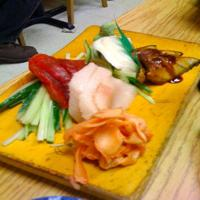

In [ ]:
folder_path = '/content/output_dataset/train/Biodegradable Images'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image file
selected_image = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(folder_path, selected_image)

# Display the image
display(Image(filename=image_path))

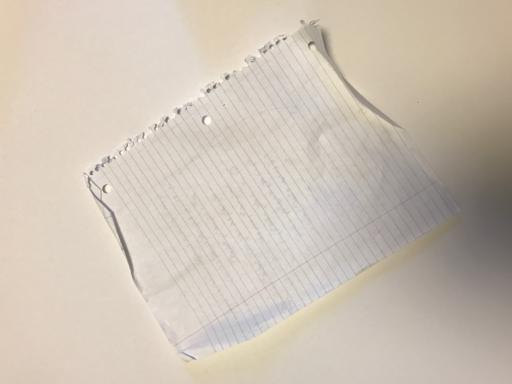

In [84]:
folder_path = '/content/output_dataset/train/Recyclable Images'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image file
selected_image = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(folder_path, selected_image)

# Display the image
display(Image(filename=image_path))

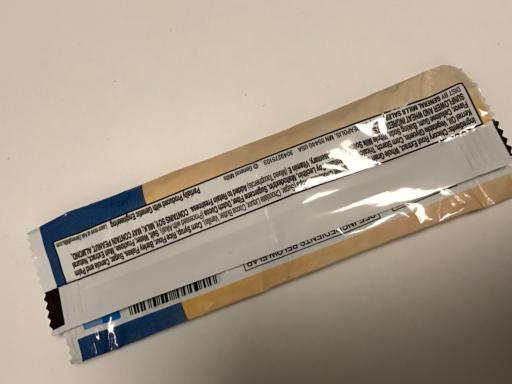

In [88]:
folder_path = '/content/output_dataset/train/Trash Images'

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image file
selected_image = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(folder_path, selected_image)

# Display the image
display(Image(filename=image_path))

In [90]:
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

In [91]:
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, shear_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [92]:
train = train_datagen.flow_from_directory(trainpath, target_size = (224,224), batch_size = 20)
test = test_datagen.flow_from_directory(testpath, target_size = (224,224), batch_size = 20)

Found 234 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


# **MODEL**

In [93]:
vgg = VGG16(include_top = False, input_shape = (224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [94]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [106]:
for layer in vgg.layers:
    layer.trainable = False

In [107]:
x = Flatten()(vgg.output)

In [108]:
output = Dense(4, activation = 'softmax')(x)

In [109]:
vgg16 = Model(vgg.input, output)

In [110]:
vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       100,356 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,815,044 (56.51 MB)

 Trainable params: 100,356 (392.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [111]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [112]:
opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ## Train the model with early stopping callback
history = vgg16.fit(train, validation_data=test,
                    epochs=10,
                    steps_per_epoch=5,
                    callbacks=[early_stopping])

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4556 - loss: 1.6490 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 100s 23s/step - accuracy: 0.4683 - loss: 1.6259 - val_accuracy: 0.3846 - val_loss: 1.1724
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 103s 23s/step - accuracy: 0.6318 - loss: 0.8554 - val_accuracy: 0.7179 - val_loss: 0.6406
Epoch 3/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.8125 - loss: 0.4214

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 14s/step - accuracy: 0.8200 - loss: 0.4136 - val_accuracy: 0.7051 - val_loss: 0.8442
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 23s/step - accuracy: 0.7690 - loss: 0.6113 - val_accuracy: 0.7564 - val_loss: 0.8567
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 97s 21s/step - accuracy: 0.8723 - loss: 0.3532 - val_accuracy: 0.7692 - val_loss: 0.7332
Epoch 6/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 34s 12s/step - accuracy: 0.8125 - loss: 0.3591

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 14s/step - accuracy: 0.8200 - loss: 0.3311 - val_accuracy: 0.7949 - val_loss: 0.7095
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 156s 22s/step - accuracy: 0.9362 - loss: 0.1769 - val_accuracy: 0.7564 - val_loss: 0.7166
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 97s 21s/step - accuracy: 0.9391 - loss: 0.1334 - val_accuracy: 0.7821 - val_loss: 0.7430
Epoch 9/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 35s 12s/step - accuracy: 0.9500 - loss: 0.1774

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 68s 14s/step - accuracy: 0.9500 - loss: 0.1779 - val_accuracy: 0.7564 - val_loss: 0.7897


# TESTING

In [134]:
image_path = '/content/waste_dataset/Dataset/Recyclable Images/paper100.jpeg'

In [135]:
img = load_img(image_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds
labels[np.argmax(preds)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


'Recyclable Images'

# **SAVING THE MODEL**

In [139]:
vgg16.save('waste_classification_model.h5')